In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
import re
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn
import pickle
import matplotlib.pyplot as plt

import pickle

In [2]:
df_sen = pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',sheet_name = None)

In [3]:
sentiment_names = ['Negative','Positive','Uncertainty','Litigious','StrongModal','WeakModal','Constraining']

In [4]:
df_sen['Negative'].dropna().values.reshape((-1)).shape

(2354,)

In [5]:
with open('dic_final_extra_sentiment.pkl','rb') as f:
    dic_extra_sentiment = pickle.load(f)

In [6]:
dic_extra_sentiment['Negative']

array(['APPEALED', 'TAMPERING', 'INTERLOCUTORY', 'WANTON', 'OSCS',
       'PUNISHABLE', 'LAWSUIT', 'RULED', 'VIGOROUSLY', 'VICTIMIZED',
       'MOOT', 'RANSOMWARE', 'WILLINGLY', 'BASELESS', 'DECLARATORY',
       'CIVILLY', 'WRITS', 'AGGRIEVED', 'HESITANT', 'LAWSUITS',
       'VOIDABLE', 'SANCTIONS', 'CODEFENDANT', 'EXITING', 'PUNISH',
       'PERPETRATORS', 'ADJUDGED', 'OVERSTEPPED', 'CLRA', 'PROCEEDING',
       'HIDING', 'ASSERTED', 'OVERRULED', 'MOREOVER', 'ALTOGETHER',
       'SOFTNESS', 'REHEAR', 'TORTIOUS', 'INFLICTION', 'REPUTATION',
       'PREEMPTS', 'FRISK', 'COUNTERSUED', 'RESOLVED', 'COURT',
       'UNPRECEDENTED', 'PATENTS', 'TRICKERY', 'ARBITRABLE', 'ASSERTING',
       'OPPRESSIVE', 'TERROR', 'SEEN', 'LEGITIMATE', 'REASSERTED',
       'REPLEAD', 'CORRECT', 'ECONOMY', 'PREVENT', 'CHRONIC', 'PATENT',
       'INFRINGER', 'SOARING', 'MOTIONS', 'APPELLATE', 'ABETTED',
       'HACKING', 'CYBER', 'MIRED', 'WRONGS', 'TREBLE', 'INJUNCTIVE',
       'MUTED', 'SOFTENING', 'OPPRESSION'

In [5]:
def get_CountWords(df_sen,upper_txt,dic_extra_sentiment=None):
    '''
    input:
        df_sen: Orderdictionary, from Mcdonald's SentimentWordLists
        upper_txt: string, upper txt for finiancial report 
    output:
        dic_list: list of dictionary, record each word frequency for every sentiment
        freq_list: list of ints, total frequency for each sentiment
    '''
    # count words from a document
    dic_list = []
    freq_list = []

    for emotion,df in df_sen.items():
        if(emotion != 'Documentation'):
            dic = {}
            freq = 0
            if(dic_extra_sentiment):
                sentiment_words = np.append(df.dropna().values.reshape((-1)),dic_extra_sentiment[emotion])
            else:
                sentiment_words = df.dropna().values.reshape((-1))
                
            for key in sentiment_words:
                num = len(re.findall(key,upper_txt))
                dic[key] = num
                freq += num
            dic_list.append(dic)
            freq_list.append(freq)
    return dic_list, freq_list

In [8]:
dic_list, freq_list = get_CountWords(df_sen,upper_txt)

NameError: name 'freq_list' is not defined

### 文章->分詞->output 7 情緒個別的分數（freq）

In [9]:
score_QK = pd.read_csv('score_QK.csv')

In [10]:
score_QK

,company,date,return,bad,url,QK,score,adjust_datetime
0,A,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,"[508, 176, 250, 304, 63, 143, 116]",2000-03-15
1,A,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,"[494, 133, 223, 278, 42, 133, 97]",2000-06-12
2,A,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,"[569, 172, 231, 284, 47, 126, 127]",2001-01-17
3,A,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,"[449, 121, 200, 232, 40, 123, 111]",2001-03-19
4,A,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,"[519, 123, 209, 225, 47, 130, 107]",2001-06-14
5,A,2002-01-22,1.034088,0.0,/Archives/edgar/data/1090872/00008916180200018...,K,"[663, 168, 262, 243, 54, 130, 156]",2002-01-22
6,A,2002-03-06,0.741458,0.0,/Archives/edgar/data/1090872/00008916180200104...,Q,"[547, 173, 257, 183, 41, 129, 132]",2002-03-06
7,A,2002-06-05,0.560176,1.0,/Archives/edgar/data/1090872/00008916180200270...,Q,"[569, 166, 267, 203, 31, 129, 147]",2002-06-05
8,A,2002-12-20,0.712024,1.0,/Archives/edgar/data/1090872/00008916180200562...,K,"[1197, 353, 448, 302, 93, 154, 284]",2002-12-20
9,A,2003-03-12,1.192572,0.0,/Archives/edgar/data/1090872/00008916180300121...,Q,"[874, 256, 381, 283, 69, 145, 230]",2003-03-12


In [ ]:
crawl_index = score_QK['date'].values

In [5]:
extra_df = pd.read_csv('./sasa/extra_QK.csv')
extra_df = extra_df.dropna()

In [6]:
extra_df.head()

,company,date,adjust_datetime,return,bad,url,QK,text
0,AAPL,1994-12-13,1994-12-13 00:00:00,0.993610,0.0,/Archives/edgar/data/320193/0000320193-94-0000...,K,item 7. management's discussion and analysis o...
1,AAPL,1994-12-30,1994-12-30 00:00:00,0.973724,0.0,/Archives/edgar/data/320193/0000320193-95-0000...,Q,item 2. management's discussion and analysis o...
2,AAPL,1995-03-31,1995-03-31 00:00:00,1.330258,0.0,/Archives/edgar/data/320193/0000320193-95-0000...,Q,item 2. management's discussion and analysis o...
3,AAPL,1995-12-19,1995-12-19 00:00:00,0.918606,0.0,/Archives/edgar/data/320193/0000320193-95-0000...,K,item 7. management's discussion and analysis o...
4,AAPL,1995-12-29,1995-12-29 00:00:00,0.803963,1.0,/Archives/edgar/data/320193/0000320193-96-0000...,Q,item 2. management's discussion and analysis o...


In [11]:
item2_df = pd.read_csv('./sasa/cut_text_all_QK.csv')
item2_df = item2_df.dropna()

In [12]:
item2_df

,company,date,adjust_datetime,return,bad,url,QK,text
0,A,2000-03-15,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,item 2. management's discussion and analysis o...
1,A,2000-06-12,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,item 2. management's discussion and analysis o...
2,A,2000-09-01,2000-09-01,0.893940,0.0,/Archives/edgar/data/1090872/00009120570004000...,Q,item 2. management's discussion and analysis o...
3,A,2001-01-17,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,item 7. management's discussion and analysis o...
4,A,2001-03-19,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,item 2. management's discussion and analysis o...
5,A,2001-06-14,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,item 2. management's discussion and analysis o...
6,A,2001-09-14,2001-09-14,1.462535,0.0,/Archives/edgar/data/1090872/00010958110150492...,Q,item 2. managements discussion and analysis o...
7,A,2002-01-22,2002-01-22,1.034088,0.0,/Archives/edgar/data/1090872/00008916180200018...,K,item 7. managements discussion and analysis o...
8,A,2002-03-06,2002-03-06,0.741458,0.0,/Archives/edgar/data/1090872/00008916180200104...,Q,item 2. managements discussion and analysis o...
9,A,2002-06-05,2002-06-05,0.560176,1.0,/Archives/edgar/data/1090872/00008916180200270...,Q,item 2. managements discussion and analysis o...


In [3]:
cc = item2_df['company'].values

In [7]:
item2_df.head(10)

,company,date,return,bad,url,QK,text
0,A,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,item 2. management's discussion and analysis o...
1,A,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,item 2. management's discussion and analysis o...
3,A,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,item 7. management's discussion and analysis o...
4,A,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,item 2. management's discussion and analysis o...
5,A,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,item 2. management's discussion and analysis o...
7,A,2002-01-22,1.034088,0.0,/Archives/edgar/data/1090872/00008916180200018...,K,item 7. managements discussion and analysis o...
8,A,2002-03-06,0.741458,0.0,/Archives/edgar/data/1090872/00008916180200104...,Q,item 2. managements discussion and analysis o...
9,A,2002-06-05,0.560176,1.0,/Archives/edgar/data/1090872/00008916180200270...,Q,item 2. managements discussion and analysis o...
11,A,2002-12-20,0.712024,1.0,/Archives/edgar/data/1090872/00008916180200562...,K,item 7. managements discussion and analysis o...
12,A,2003-03-12,1.192572,0.0,/Archives/edgar/data/1090872/00008916180300121...,Q,item 2. managements discussion and analysis o...


In [14]:
item_df_merge = pd.merge(item2_df,score_QK,how='left')

In [19]:
item2_df

,company,date,adjust_datetime,return,bad,url,QK,text,score
0,A,2000-03-15,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,item 2. management's discussion and analysis o...,"[508, 176, 250, 304, 63, 143, 116]"
1,A,2000-06-12,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,item 2. management's discussion and analysis o...,"[494, 133, 223, 278, 42, 133, 97]"
2,A,2000-09-01,2000-09-01,0.893940,0.0,/Archives/edgar/data/1090872/00009120570004000...,Q,item 2. management's discussion and analysis o...,NaN
3,A,2001-01-17,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,item 7. management's discussion and analysis o...,"[569, 172, 231, 284, 47, 126, 127]"
4,A,2001-03-19,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,item 2. management's discussion and analysis o...,"[449, 121, 200, 232, 40, 123, 111]"
5,A,2001-06-14,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,item 2. management's discussion and analysis o...,"[519, 123, 209, 225, 47, 130, 107]"
6,A,2001-09-14,2001-09-14,1.462535,0.0,/Archives/edgar/data/1090872/00010958110150492...,Q,item 2. managements discussion and analysis o...,NaN
7,A,2002-01-22,2002-01-22,1.034088,0.0,/Archives/edgar/data/1090872/00008916180200018...,K,item 7. managements discussion and analysis o...,"[663, 168, 262, 243, 54, 130, 156]"
8,A,2002-03-06,2002-03-06,0.741458,0.0,/Archives/edgar/data/1090872/00008916180200104...,Q,item 2. managements discussion and analysis o...,"[547, 173, 257, 183, 41, 129, 132]"
9,A,2002-06-05,2002-06-05,0.560176,1.0,/Archives/edgar/data/1090872/00008916180200270...,Q,item 2. managements discussion and analysis o...,"[569, 166, 267, 203, 31, 129, 147]"


In [18]:
item2_df = item_df_merge

In [24]:
type(item2_df.iloc[2]['score'])

float

In [1]:
def get_alldoc_CountWords(input_):
    item2_df,df_sen,index,dic_extra_sentiment = input_
    company_dic_list = {}
    company_score_list = {}
    sentiment_scores_list = []
    ans = item2_df.copy()
    
    if(dic_extra_sentiment):
        filename_dic = f'company_cutwords_sentiment_dic_{index}_extra_QK.pkl'
        filename_score = f'company_cutwords_score_dic_{index}_extra_QK.pkl'
        filename_all = f'item2_{index}_extra_QK.csv'
    else:
        filename_dic = f'company_cutwords_sentiment_dic_{index}_QK.pkl'
        filename_score = f'company_cutwords_score_dic_{index}_QK.pkl'
        filename_all = f'item2_{index}_QK.csv'
        
    for i,txt in enumerate(item2_df['text'].values):
        if(i %1000 == 0):
            print(i)
            
        if(type(item2_df.iloc[i]['score']) != str):

            # to upper
            try:
                upper_txt = txt.upper()
            except:
                print(i,txt)
                assert (0 == 1)

            # cut words
            dic_list, freq_list = get_CountWords(df_sen,upper_txt,dic_extra_sentiment)
            sentiment_scores_list.append(str(freq_list))


            # save to dic
            company_dic_list[i] = dic_list
            company_score_list[i] = freq_list
        else:
            company_dic_list[i] = dic_list
            company_score_list[i] = freq_list
            sentiment_scores_list.apend(item2_df.iloc[i]['score'])
            
    # save to dataframe
    
    
    with open(filename_dic,'wb') as f:
        pickle.dump(company_dic_list,f)
    with open(filename_score,'wb') as f:
        pickle.dump(company_score_list,f) 

    ans['score'] = np.array(sentiment_scores_list)
    ans.to_csv(filename_all)
        
    return ans

### Cut words

In [8]:
item2_df = pd.read_csv('item2_df_1.csv')

In [9]:
work = (item2_df,df_sen,1,None)

In [ ]:
ans = get_alldoc_CountWords(work)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000


In [17]:
import multiprocess

In [20]:
length = item2_df.shape[0]
quarter = int(length/4)

item2_df_0, item2_df_1, item2_df_2, item2_df_3 = item2_df[:quarter], item2_df[quarter:2*quarter],\
                                                item2_df[quarter*2:quarter*3], item2_df[quarter*3:]
works = [(item2_df_0,df_sen,0,None),(item2_df_1,df_sen,1,None),(item2_df_2,df_sen,2,None),(item2_df_3,df_sen,3,None)]

In [27]:
ans = []

if __name__ == '__main__':
    pool = multiprocess.Pool(processes=4)
    ans.append(pool.map(get_alldoc_CountWords,works))

error: 'i' format requires -2147483648 <= number <= 2147483647

In [19]:
temp = pd.concat([ans[0][0],ans[0][1],ans[0][2],ans[0][3]],axis = 0)

In [20]:
temp

,company,date,return,bad,url,QK,text,score
0,A,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,item 2. management's discussion and analysis o...,"[508, 176, 250, 304, 63, 143, 116]"
1,A,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,item 2. management's discussion and analysis o...,"[494, 133, 223, 278, 42, 133, 97]"
3,A,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,item 7. management's discussion and analysis o...,"[569, 172, 231, 284, 47, 126, 127]"
4,A,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,item 2. management's discussion and analysis o...,"[449, 121, 200, 232, 40, 123, 111]"
5,A,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,item 2. management's discussion and analysis o...,"[519, 123, 209, 225, 47, 130, 107]"
7,A,2002-01-22,1.034088,0.0,/Archives/edgar/data/1090872/00008916180200018...,K,item 7. managements discussion and analysis o...,"[663, 168, 262, 243, 54, 130, 156]"
8,A,2002-03-06,0.741458,0.0,/Archives/edgar/data/1090872/00008916180200104...,Q,item 2. managements discussion and analysis o...,"[547, 173, 257, 183, 41, 129, 132]"
9,A,2002-06-05,0.560176,1.0,/Archives/edgar/data/1090872/00008916180200270...,Q,item 2. managements discussion and analysis o...,"[569, 166, 267, 203, 31, 129, 147]"
11,A,2002-12-20,0.712024,1.0,/Archives/edgar/data/1090872/00008916180200562...,K,item 7. managements discussion and analysis o...,"[1197, 353, 448, 302, 93, 154, 284]"
12,A,2003-03-12,1.192572,0.0,/Archives/edgar/data/1090872/00008916180300121...,Q,item 2. managements discussion and analysis o...,"[874, 256, 381, 283, 69, 145, 230]"


In [ ]:
temp.to_csv('score_QK.csv',index=False)

In [10]:
work = [extra_df,df_sen,0,None]
extra_score = get_alldoc_CountWords(work)

0
1000


In [10]:
temp = pd.read_csv('score_QK.csv')

In [11]:
temp.head()

,company,date,return,bad,url,QK,text,score
0,A,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,item 2. management's discussion and analysis o...,"[508, 176, 250, 304, 63, 143, 116]"
1,A,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,item 2. management's discussion and analysis o...,"[494, 133, 223, 278, 42, 133, 97]"
2,A,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,item 7. management's discussion and analysis o...,"[569, 172, 231, 284, 47, 126, 127]"
3,A,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,item 2. management's discussion and analysis o...,"[449, 121, 200, 232, 40, 123, 111]"
4,A,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,item 2. management's discussion and analysis o...,"[519, 123, 209, 225, 47, 130, 107]"


### Extra sentiment 

In [14]:
length = item2_df.shape[0]
quarter = int(length/4)

item2_df_0, item2_df_1, item2_df_2, item2_df_3 = item2_df[:quarter], item2_df[quarter:2*quarter],\
                                                item2_df[quarter*2:quarter*3], item2_df[quarter*3:]
works = [(item2_df_0,df_sen,0,dic_extra_sentiment),(item2_df_1,1,dic_extra_sentiment),\
         (item2_df_2,df_sen,2,dic_extra_sentiment),(item2_df_3,df_sen,3,dic_extra_sentiment)]

In [17]:
work = [item2_df,df_sen,0,dic_extra_sentiment]

In [ ]:
ans = get_alldoc_CountWords(work)

0
1000


In [3]:
temp = pd.read_csv('item2_0_extra_QK.csv')

In [6]:
del temp['Unnamed: 0']
del temp['text']

In [7]:
temp.tail()

,company,date,adjust_datetime,return,bad,url,QK,score
251275,SMRT,2017-04-29,2017-04-29,0.560538,1.0,/Archives/edgar/data/884940/000119312517198520...,Q,"[77, 39, 37, 26, 5, 8, 12]"
251276,SMRT,2017-07-29,2017-07-29,0.888888,0.0,/Archives/edgar/data/884940/000119312517275632...,Q,"[105, 54, 52, 33, 5, 15, 25]"
251277,SMRT,2018-05-04,2018-05-04,1.105881,0.0,/Archives/edgar/data/884940/000119312518152760...,K,"[306, 223, 85, 128, 17, 19, 69]"
251278,SMRT,2018-05-05,2018-05-05,0.756096,1.0,/Archives/edgar/data/884940/000119312518186895...,Q,"[141, 80, 83, 78, 6, 50, 25]"
251279,SMRT,2018-08-04,2018-08-04,0.637737,1.0,/Archives/edgar/data/884940/000119312518264999...,Q,"[162, 87, 49, 81, 7, 14, 22]"


In [8]:
temp.to_csv('score_QK_extra.csv',index = False)

In [15]:
ans = []

if __name__ == '__main__':
    pool = multiprocess.Pool(processes=4)
    ans.append(pool.map(get_alldoc_CountWords,works))

error: 'i' format requires -2147483648 <= number <= 2147483647

In [28]:
temp = pd.concat([ans[0][0],ans[0][1],ans[0][2],ans[0][3]],axis = 0)

In [29]:
temp.to_csv('score_extra_QK.csv',index=False)

### Check for Score

In [159]:
import ast

In [164]:
def get_scoresum(df):
    scoresum_list = []
    df_score = df['score'].values
    for score in df_score:
        scoresum_list.append(sum(ast.literal_eval(score)))
    return scoresum_list

In [172]:
scoresum_lsit = np.array(get_scoresum(temp))
print(scoresum_lsit.shape)

(13698,)


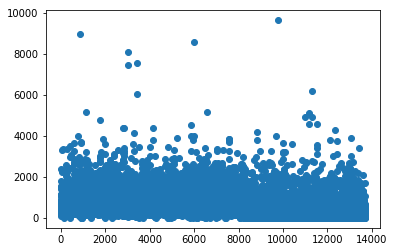

In [169]:
plt.scatter([i for i in range(scoresum_lsit.shape[0])],scoresum_lsit)
plt.show()

In [ ]:
plt.hist(scoresum_lsit,100)
plt.show()

### Check for item2

In [16]:
bb = item2_df['text'].values

In [18]:
bb[0]==bb[2]

False

### Check for fp_url

In [86]:
with open('./fp_url_htm/company_fp_dic_final.pkl','rb') as f:
    company_fp_dic = pickle.load(f)

In [91]:
tickers = pd.read_csv('all_ticker.csv').iloc[:,1].values

In [92]:
tickers

array(['FSLA', 'DSKE', 'CHIR', ..., 'CERO', 'ATRS', 'VIPTS'], dtype=object)

In [94]:
company_fp_dic[tickers[1]]

['/Archives/edgar/data/1642453/000155837018008662/dske-20180930x10q.htm',
 '/Archives/edgar/data/1642453/000155837018006913/dske-20180630x10q.htm',
 '/Archives/edgar/data/1642453/000155837018004675/dske-20180331x10q.htm',
 '/Archives/edgar/data/1642453/000155837017008737/dske-20170930x10q.htm',
 '/Archives/edgar/data/1642453/000155837017006437/dske-20170630x10q.htm',
 '/Archives/edgar/data/1642453/000155837017004101/dske-20170331x10q.htm',
 '/Archives/edgar/data/1642453/000121390016017854/f10q0916_hennessycapital.htm',
 '/Archives/edgar/data/1642453/000121390016015099/f10q0616_hennessycapii.htm',
 '/Archives/edgar/data/1642453/000121390016013312/f10q0316_hennessycapital2.htm',
 '/Archives/edgar/data/1642453/000121390015008432/f10q0915_hennessycapital.htm',
 '/Archives/edgar/data/1642453/000121390015006739/f10q0615_hennessycapitalii.htm']